# Attention ! generate the new files after cleaning data from used variable names !!!!!!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Unary

In [ ]:
df = pd.read_csv("/content/unaryData.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,problem,problem_entities
0,A should be greater than 9,"[{""start"": 0, ""end"": 1, ""type"": ""VARIABLE"", ""e..."
1,U must be greater than 13,"[{""start"": 0, ""end"": 1, ""type"": ""VARIABLE"", ""e..."
2,The quantity Ypsilon must surpass 0.,"[{""start"": 0, ""end"": 12, ""type"": ""DESC"", ""enti..."
3,Ensure that Bravo is of a magnitude greater th...,"[{""start"": 0, ""end"": 11, ""type"": ""DESC"", ""enti..."
4,It is imperative that Tango exceeds a value of 3.,"[{""start"": 0, ""end"": 21, ""type"": ""DESC"", ""enti..."
...,...,...
291,zhte8 should not be equal to 35.,"[{""start"": 0, ""end"": 5, ""type"": ""VARIABLE"", ""e..."
292,MpD must not be equal to 25.,"[{""start"": 0, ""end"": 3, ""type"": ""VARIABLE"", ""e..."
293,LZR should not be equal to 40.,"[{""start"": 0, ""end"": 3, ""type"": ""VARIABLE"", ""e..."
294,p3 should not be equal to 70.,"[{""start"": 0, ""end"": 2, ""type"": ""VARIABLE"", ""e..."


In [ ]:
variables = []
gtExpressions = []
geExpressions = []
ltExpressions = []
leExpressions = []
eqExpressions = []
neExpressions = []

In [ ]:
import json
import re


for i in range(len(df)):
  txt = df.iloc[i]["problem"]
  labels = json.loads(re.sub(r"'(?=\})",'"',re.sub(r"'(?=,)",'"',re.sub(r"(?<=: )'",'"',re.sub(r"(?<=, )'",'"',re.sub(r"'(?=:)",'"',re.sub(r"(?<={)'",'"',str(df.iloc[i]["problem_entities"]))))))))
  for l in labels:
    if l["type"] == "VARIABLE":
      variables.append(txt[l["start"]:l["end"]])
    elif l["type"] == "gtConst":
      gtExpressions.append(txt[l["start"]:l["end"]])
    elif l["type"] == "geConst":
      geExpressions.append(txt[l["start"]:l["end"]])
    elif l["type"] == "ltConst":
      ltExpressions.append(txt[l["start"]:l["end"]])
    elif l["type"] == "leConst":
      leExpressions.append(txt[l["start"]:l["end"]])
    elif l["type"] == "eqConst":
      eqExpressions.append(txt[l["start"]:l["end"]])
    elif l["type"] == "neConst":
      neExpressions.append(txt[l["start"]:l["end"]])


In [ ]:
len(variables)

296

In [ ]:
len(np.unique(variables))

294

## Variables

In [ ]:
# length of a varialbe
# number of letters/digits
# spaces
# nb unique

uniqueVars = np.unique(variables)
lenunique = len(uniqueVars)

varsStat = pd.DataFrame(columns= ["variableName", "length","nbLetters","nbDigits","space"])

for v in uniqueVars:
  varsStat = pd.concat(
        [
            varsStat, pd.DataFrame(
                {
      "variableName":v,
      "length":len(v),
      "nbLetters":len([vv for vv in v if not vv.isnumeric()]),
      "nbDigits":len([vv for vv in v if vv.isnumeric()]),
      "space":" " in v
  }
                ,
                index=[len(varsStat)])
        ]
    )


<ipython-input-6-fcd2686e4318>:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  varsStat = pd.concat(
<ipython-input-6-fcd2686e4318>:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  varsStat = pd.concat(
<ipython-input-6-fcd2686e4318>:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  varsStat = pd.concat(
<ipython-input-6-fcd2686e4318>:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  varsStat = pd.concat(
<ipython-input-6-fcd2686e4318>:12: FutureWarning: In a future version, o

In [ ]:
varsStat

,variableName,length,nbLetters,nbDigits,space
0,2YP,3,2,1,False
1,A,1,1,0,False
2,A9,2,1,1,False
3,ABC,3,3,0,False
4,ABsC,4,4,0,False
...,...,...,...,...,...
289,yu90,4,2,2,False
290,z2er,4,3,1,False
291,zdks,4,4,0,False
292,zee 22,6,4,2,True


In [ ]:
lens = 0

for i in range(len(varsStat)):
  lens+=varsStat.iloc[i]["length"]
lens/len(varsStat)

3.945578231292517

[Text(0, 0, '25.0'),
 Text(0, 0, '44.0'),
 Text(0, 0, '75.0'),
 Text(0, 0, '49.0'),
 Text(0, 0, '47.0'),
 Text(0, 0, '24.0'),
 Text(0, 0, '12.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '1.0'),
 Text(0, 0, '1.0'),
 Text(0, 0, '1.0')]

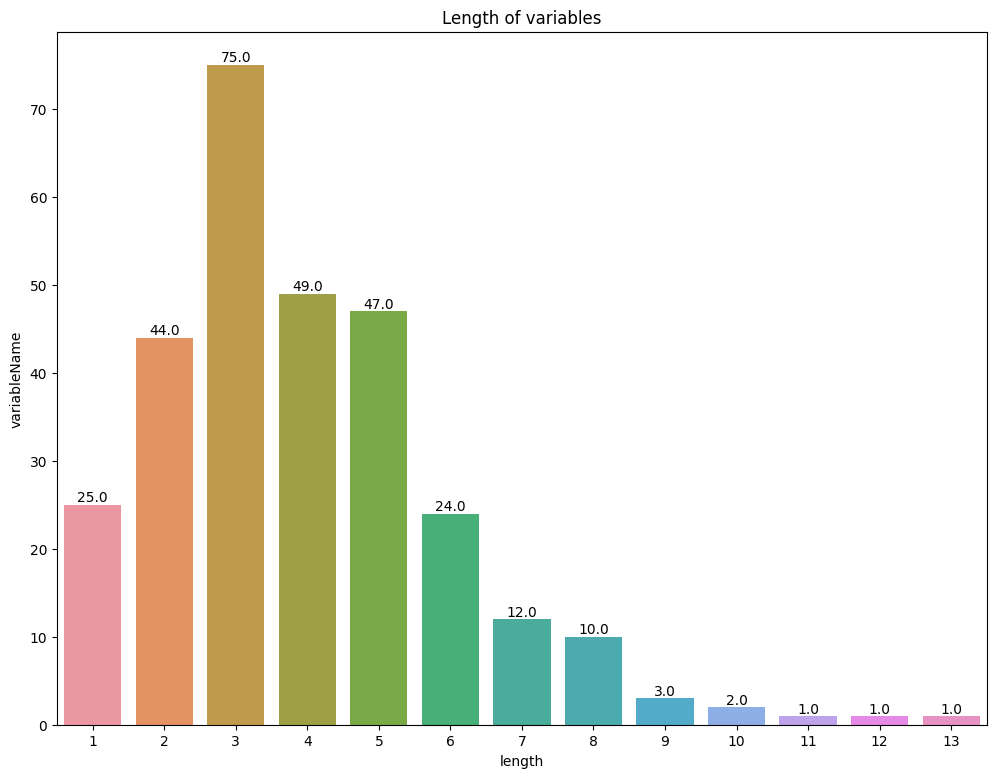

In [ ]:
# number of variables by length

d = varsStat.groupby(['length']).count()
plt.figure(figsize=(12,9))
plt.title("Length of variables")
# plt.ylabel("number of variables")
# plt.xlabel("length of the variable")
o = sn.barplot(data=d, x=d.index,y="variableName")
o.bar_label(o.containers[0], fmt='%.1f')

[Text(0, 0, '46.0'),
 Text(0, 0, '66.0'),
 Text(0, 0, '60.0'),
 Text(0, 0, '53.0'),
 Text(0, 0, '32.0'),
 Text(0, 0, '14.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '2.0')]

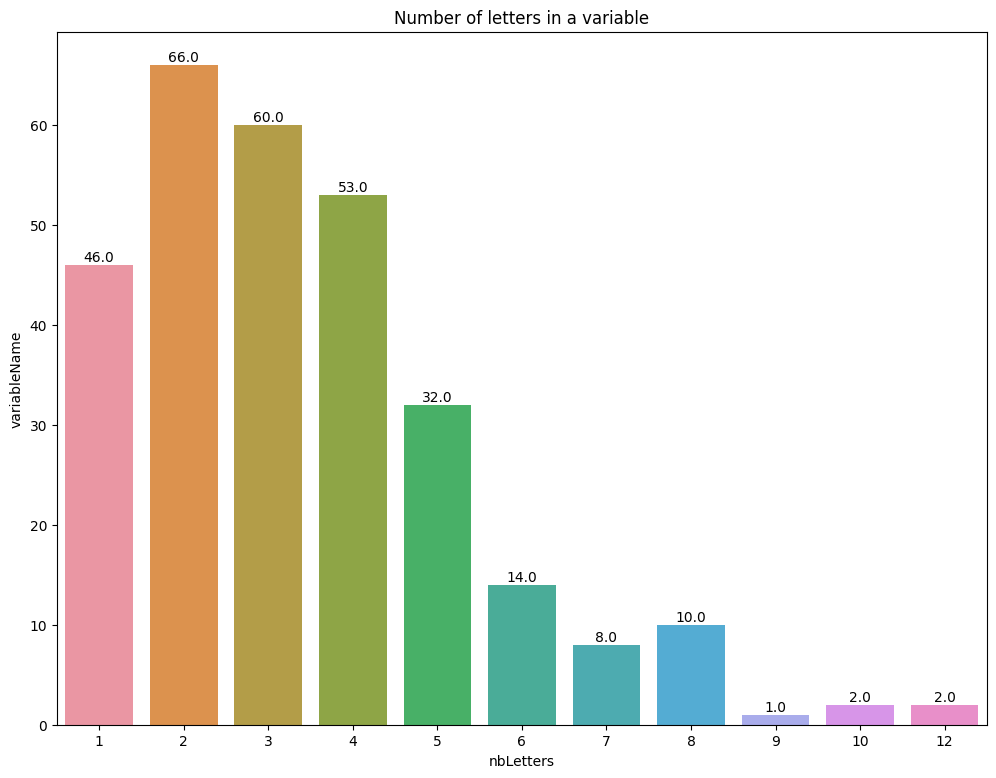

In [ ]:
d = varsStat.groupby(['nbLetters']).count()
plt.figure(figsize=(12,9))
plt.title("Number of letters in a variable")
# plt.ylabel("number of variables")
# plt.xlabel("length of the variable")
o = sn.barplot(data=d, x=d.index,y="variableName")
o.bar_label(o.containers[0], fmt='%.1f')

[Text(0, 0, '169.0'),
 Text(0, 0, '97.0'),
 Text(0, 0, '24.0'),
 Text(0, 0, '4.0')]

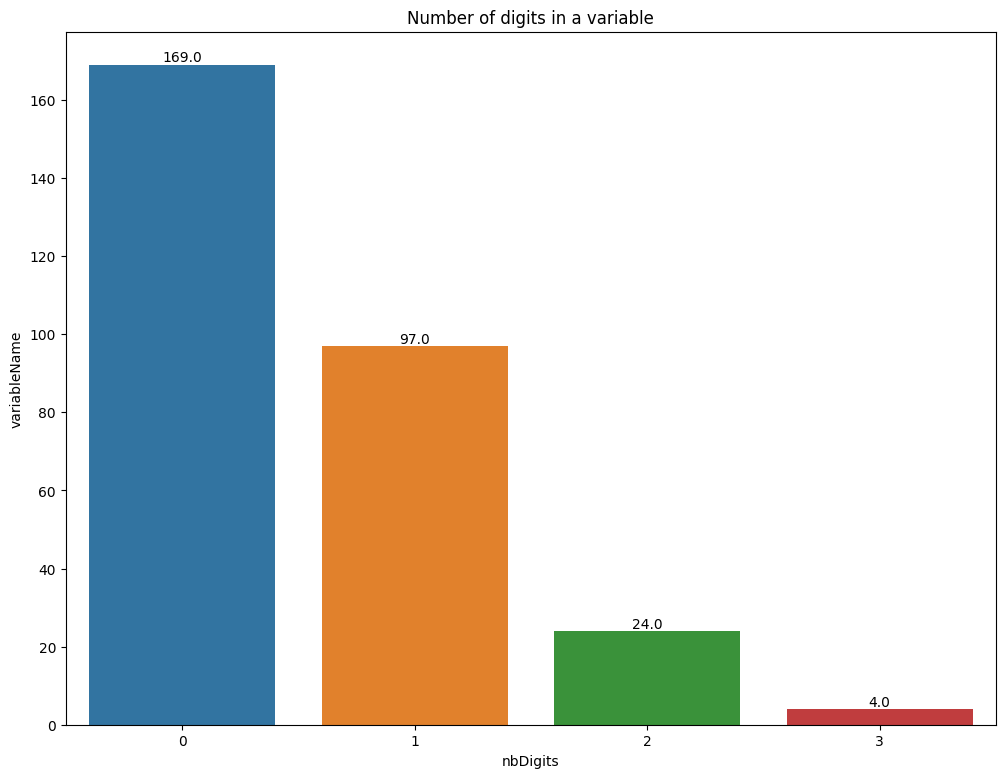

In [ ]:
d = varsStat.groupby(['nbDigits']).count()
plt.figure(figsize=(12,9))
plt.title("Number of digits in a variable")
# plt.ylabel("number of variables")
# plt.xlabel("length of the variable")
o = sn.barplot(data=d, x=d.index,y="variableName")
o.bar_label(o.containers[0], fmt='%.1f')

In [ ]:
d = varsStat.groupby(['space']).count()
d

,variableName,length,nbLetters,nbDigits
space,,,,
False,268,268,268,268
True,26,26,26,26


[Text(0, 0, '268.0'), Text(0, 0, '26.0')]

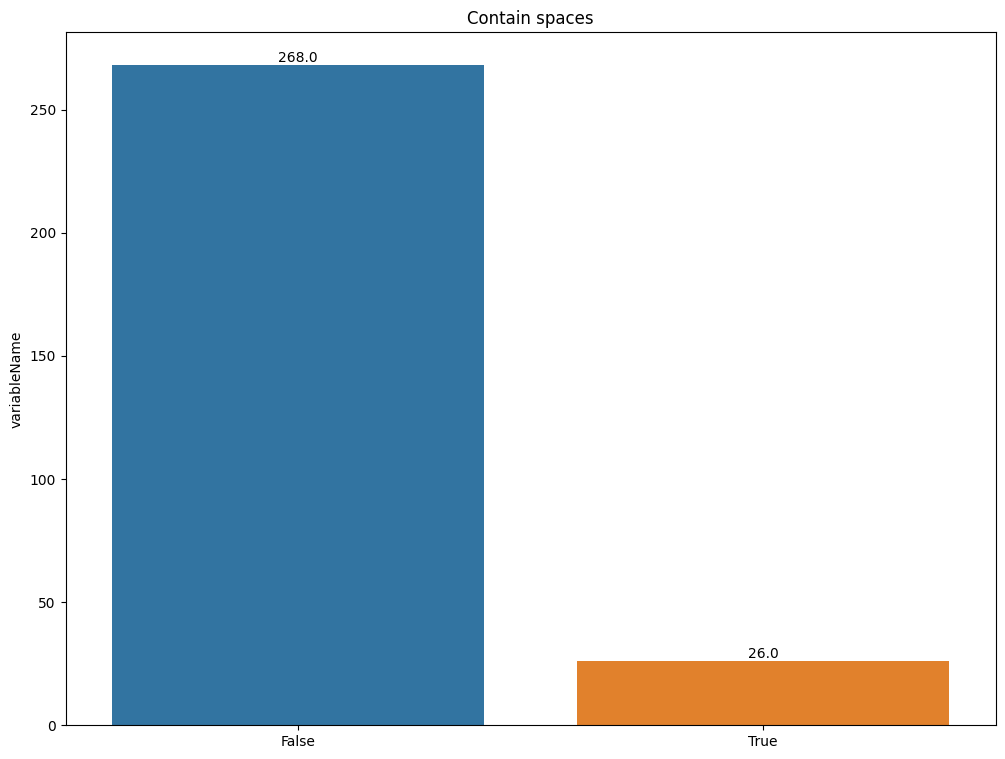

In [ ]:

d = varsStat.groupby(['space']).count()
plt.figure(figsize=(12,9))
plt.title("Contain spaces")
# plt.ylabel("number of variables")
# plt.xlabel("length of the variable")
o = sn.barplot(data=d, x=[str(v) for v in d.index.values],y="variableName")
o.bar_label(o.containers[0], fmt='%.1f')

In [ ]:
from wordcloud import WordCloud

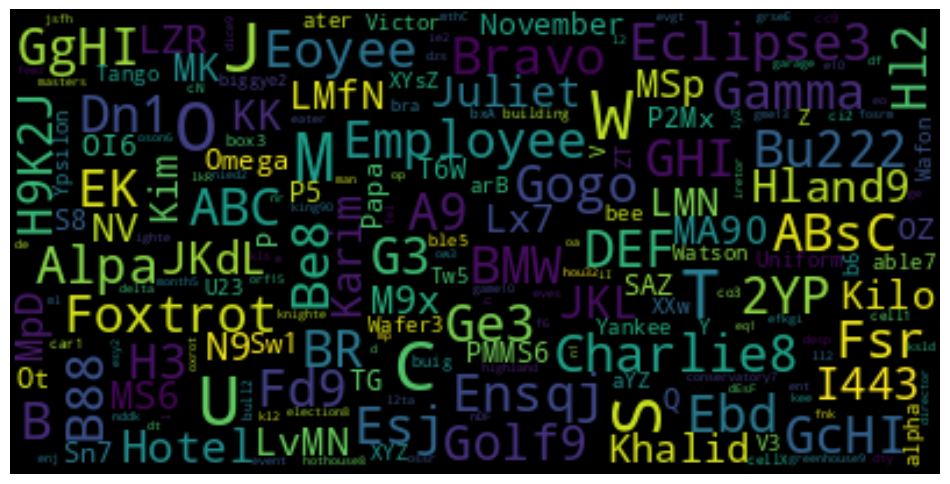

In [ ]:

vars = ""
for vv in np.unique(variables):
  vars += vv+" "



wordcloud = WordCloud(max_font_size=30).generate(vars)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Expressions

In [ ]:
dff = pd.DataFrame([
    {
    "Unique Expressions":list(np.unique(gtExpressions))
    },
    {
    "Unique Expressions":list(np.unique(geExpressions))
    },
    {
    "Unique Expressions":list(np.unique(ltExpressions))
    },
    {
    "Unique Expressions":list(np.unique(leExpressions))
    },
    {
    "Unique Expressions":list(np.unique(eqExpressions))
    },
    {
    "Unique Expressions":list(np.unique(neExpressions))
    }
    ]
    , index = ["gtConst","geConst","ltConst","leConst","eqConst","neConst"])

pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)


dff

,Unique Expressions
gtConst,"[above, exceed, exceeds, extend beyond, greater than, higher than, larger than, longer than, rise above, surpass, surpasses]"
geConst,"[above or equal to, equal to or greater than, exceed or equal, exceed or equal to, exceeds or equals, extend beyond or equal, greater or equal to, greater than or equal, greater than or equal to, higher than or equal to, longer than or equal, longer than or equal to, rise above or equal, rise above or equal to, surpass or equal, surpass or equal to]"
ltConst,"[below, fewer than, less than, lower than, not exceed, not surpass, smaller than]"
leConst,"[ less or equal to, below or equal, below or equal to, fewer than or equal to, less than or equal, less than or equal to, lower than or equal to, smaller than or equal to]"
eqConst,"[be equal to, equal, equal to, equals, equals a value of]"
neConst,"[ not be equal to, different than, distinct than, not be equal to, not equal, not equal to, not equals]"


[Text(0, 0, '11.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '16.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '7.0')]

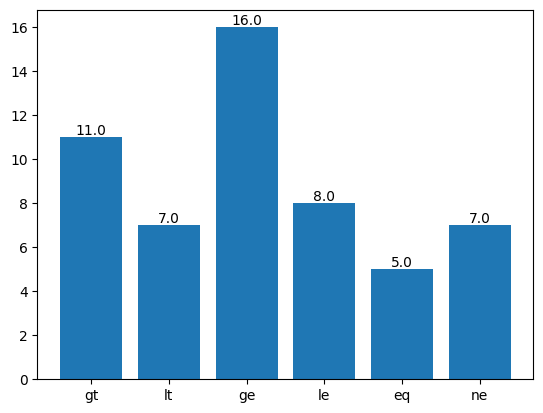

In [ ]:
labels = ["gt","lt","ge","le","eq","ne"]
lens = [len(list(np.unique(gtExpressions))),len(list(np.unique(ltExpressions))),len(list(np.unique(geExpressions))),len(list(np.unique(leExpressions))),len(list(np.unique(eqExpressions))),len(list(np.unique(neExpressions)))]

# number of unique expressions to describe each operator
plt.figure()
o = plt.bar(x=labels, height=lens)
plt.bar_label(o,fmt='%.1f')

# Binary

In [ ]:
df = pd.read_csv("/content/binaryData.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,problem,problem_entities
0,cell1 should be greater than cl2,"[{""start"": 0, ""end"": 5, ""type"": ""CONST_ELMS_LEFT"", ""entity"": ""cell1""}, {""start"": 5, ""end"": 15, ""type"": ""DESC"", ""entity"": "" should be""}, {""start"": 16, ""end"": 28, ""type"": ""gt"", ""entity"": ""greater than""}, {""start"": 29, ""end"": 32, ""type"": ""CONST_ELMS_RIGHT"", ""entity"": ""cl2""}, {""start"": 32, ""end"": 31, ""type"": ""DESC"", ""entity"": """"}]"
1,zdl should be greater than yka5,"[{""start"": 0, ""end"": 3, ""type"": ""CONST_ELMS_LEFT"", ""entity"": ""zdl""}, {""start"": 3, ""end"": 13, ""type"": ""DESC"", ""entity"": "" should be""}, {""start"": 14, ""end"": 26, ""type"": ""gt"", ""entity"": ""greater than""}, {""start"": 27, ""end"": 31, ""type"": ""CONST_ELMS_RIGHT"", ""entity"": ""yka5""}, {""start"": 31, ""end"": 30, ""type"": ""DESC"", ""entity"": """"}]"
2,oS1 should be less or equal to d2,"[{""start"": 0, ""end"": 3, ""type"": ""CONST_ELMS_LEFT"", ""entity"": ""oS1""}, {""start"": 3, ""end"": 13, ""type"": ""DESC"", ""entity"": "" should be""}, {""start"": 14, ""end"": 30, ""type"": ""le"", ""entity"": ""less or equal to""}, {""start"": 31, ""end"": 33, ""type"": ""CONST_ELMS_RIGHT"", ""entity"": ""d2""}, {""start"": 33, ""end"": 32, ""type"": ""DESC"", ""entity"": """"}]"
3,dZS1 should be less or equal to gf4,"[{""start"": 0, ""end"": 4, ""type"": ""CONST_ELMS_LEFT"", ""entity"": ""dZS1""}, {""start"": 4, ""end"": 14, ""type"": ""DESC"", ""entity"": "" should be""}, {""start"": 15, ""end"": 31, ""type"": ""le"", ""entity"": ""less or equal to""}, {""start"": 32, ""end"": 35, ""type"": ""CONST_ELMS_RIGHT"", ""entity"": ""gf4""}, {""start"": 35, ""end"": 34, ""type"": ""DESC"", ""entity"": """"}]"
4,t1 should be greater or equal to c2,"[{""start"": 0, ""end"": 2, ""type"": ""CONST_ELMS_LEFT"", ""entity"": ""t1""}, {""start"": 2, ""end"": 12, ""type"": ""DESC"", ""entity"": "" should be""}, {""start"": 13, ""end"": 32, ""type"": ""ge"", ""entity"": ""greater or equal to""}, {""start"": 33, ""end"": 35, ""type"": ""CONST_ELMS_RIGHT"", ""entity"": ""c2""}, {""start"": 35, ""end"": 34, ""type"": ""DESC"", ""entity"": """"}]"
...,...,...
319,son7 should not be equal to Matthew.,"[{""start"": 0, ""end"": 4, ""type"": ""CONST_ELMS_LEFT"", ""entity"": ""son7""}, {""start"": 4, ""end"": 11, ""type"": ""DESC"", ""entity"": "" should""}, {""start"": 12, ""end"": 27, ""type"": ""ne"", ""entity"": ""not be equal to""}, {""start"": 28, ""end"": 35, ""type"": ""CONST_ELMS_RIGHT"", ""entity"": ""Matthew""}, {""start"": 35, ""end"": 35, ""type"": ""DESC"", ""entity"": "".""}]"
320,Wyatt should not be equal to Warren.,"[{""start"": 0, ""end"": 5, ""type"": ""CONST_ELMS_LEFT"", ""entity"": ""Wyatt""}, {""start"": 5, ""end"": 12, ""type"": ""DESC"", ""entity"": "" should""}, {""start"": 13, ""end"": 28, ""type"": ""ne"", ""entity"": ""not be equal to""}, {""start"": 29, ""end"": 35, ""type"": ""CONST_ELMS_RIGHT"", ""entity"": ""Warren""}, {""start"": 35, ""end"": 35, ""type"": ""DESC"", ""entity"": "".""}]"
321,Audrey should not be equal to Aurora.,"[{""start"": 0, ""end"": 6, ""type"": ""CONST_ELMS_LEFT"", ""entity"": ""Audrey""}, {""start"": 6, ""end"": 13, ""type"": ""DESC"", ""entity"": "" should""}, {""start"": 14, ""end"": 29, ""type"": ""ne"", ""entity"": ""not be equal to""}, {""start"": 30, ""end"": 36, ""type"": ""CONST_ELMS_RIGHT"", ""entity"": ""Aurora""}, {""start"": 36, ""end"": 36, ""type"": ""DESC"", ""entity"": "".""}]"
322,Dylan should not be equal to Diel.,"[{""start"": 0, ""end"": 5, ""type"": ""CONST_ELMS_LEFT"", ""entity"": ""Dylan""}, {""start"": 5, ""end"": 12, ""type"": ""DESC"", ""entity"": "" should""}, {""start"": 13, ""end"": 28, ""type"": ""ne"", ""entity"": ""not be equal to""}, {""start"": 29, ""end"": 33, ""type"": ""CONST_ELMS_RIGHT"", ""entity"": ""Diel""}, {""start"": 33, ""end"": 33, ""type"": ""DESC"", ""entity"": "".""}]"


In [ ]:
variables = []
gtExpressions = []
geExpressions = []
ltExpressions = []
leExpressions = []
eqExpressions = []
neExpressions = []

In [ ]:
import json
import re


for i in range(len(df)):
  txt = df.iloc[i]["problem"]
  labels = json.loads(re.sub(r"'(?=\})",'"',re.sub(r"'(?=,)",'"',re.sub(r"(?<=: )'",'"',re.sub(r"(?<=, )'",'"',re.sub(r"'(?=:)",'"',re.sub(r"(?<={)'",'"',str(df.iloc[i]["problem_entities"]))))))))
  for l in labels:
    if l["type"] == "CONST_ELMS_LEFT" or l["type"] == "CONST_ELMS_RIGHT":
      variables.append(txt[l["start"]:l["end"]])
    elif l["type"] == "gt":
      gtExpressions.append(txt[l["start"]:l["end"]])
    elif l["type"] == "ge":
      geExpressions.append(txt[l["start"]:l["end"]])
    elif l["type"] == "lt":
      ltExpressions.append(txt[l["start"]:l["end"]])
    elif l["type"] == "le":
      leExpressions.append(txt[l["start"]:l["end"]])
    elif l["type"] == "eq":
      eqExpressions.append(txt[l["start"]:l["end"]])
    elif l["type"] == "ne":
      neExpressions.append(txt[l["start"]:l["end"]])


## Variables

In [ ]:
# length of a varialbe
# number of letters/digits
# spaces
# nb unique

uniqueVars = np.unique(variables)
lenunique = len(uniqueVars)

varsStat = pd.DataFrame(columns= ["variableName", "length","nbLetters","nbDigits","space"])

for v in uniqueVars:
  varsStat = pd.concat(
        [
            varsStat, pd.DataFrame(
                {
      "variableName":v,
      "length":len(v),
      "nbLetters":len([vv for vv in v if not vv.isnumeric()]),
      "nbDigits":len([vv for vv in v if vv.isnumeric()]),
      "space":" " in v
  }
                ,
                index=[len(varsStat)])
        ]
    )


<ipython-input-37-fcd2686e4318>:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  varsStat = pd.concat(
<ipython-input-37-fcd2686e4318>:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  varsStat = pd.concat(
<ipython-input-37-fcd2686e4318>:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  varsStat = pd.concat(
<ipython-input-37-fcd2686e4318>:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  varsStat = pd.concat(
<ipython-input-37-fcd2686e4318>:12: FutureWarning: In a future versi

In [ ]:
varsStat

,variableName,length,nbLetters,nbDigits,space
0,A3,2,1,1,False
1,A6,2,1,1,False
2,Aea1,4,3,1,False
3,Aiden,5,5,0,False
4,Andrew,6,6,0,False
...,...,...,...,...,...
632,ze1,3,2,1,False
633,ze2,3,2,1,False
634,zedsz8,6,5,1,False
635,zfk,3,3,0,False


In [ ]:
lens = 0

for i in range(len(varsStat)):
  lens+=varsStat.iloc[i]["length"]
lens/len(varsStat)

5.1036106750392465

[Text(0, 0, '1.0'),
 Text(0, 0, '68.0'),
 Text(0, 0, '53.0'),
 Text(0, 0, '165.0'),
 Text(0, 0, '120.0'),
 Text(0, 0, '98.0'),
 Text(0, 0, '54.0'),
 Text(0, 0, '26.0'),
 Text(0, 0, '26.0'),
 Text(0, 0, '13.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '2.0')]

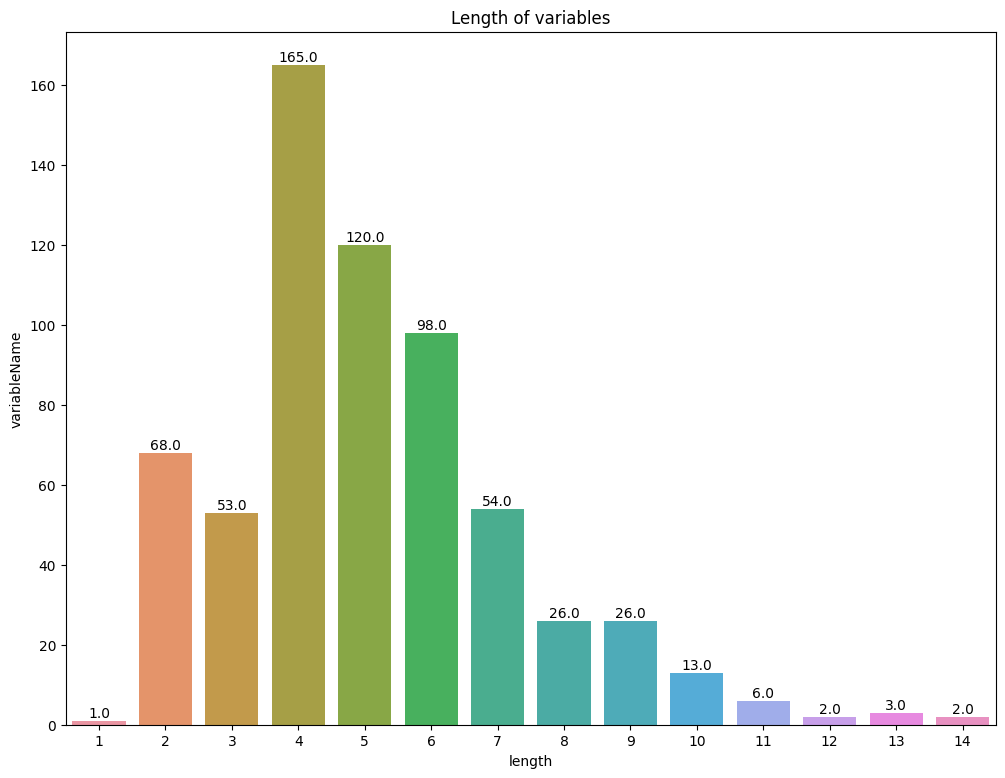

In [ ]:
# number of variables by length

d = varsStat.groupby(['length']).count()
plt.figure(figsize=(12,9))
plt.title("Length of variables")
# plt.ylabel("number of variables")
# plt.xlabel("length of the variable")
o = sn.barplot(data=d, x=d.index,y="variableName")
o.bar_label(o.containers[0], fmt='%.1f')

[Text(0, 0, '56.0'),
 Text(0, 0, '58.0'),
 Text(0, 0, '156.0'),
 Text(0, 0, '109.0'),
 Text(0, 0, '94.0'),
 Text(0, 0, '75.0'),
 Text(0, 0, '37.0'),
 Text(0, 0, '25.0'),
 Text(0, 0, '17.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '1.0'),
 Text(0, 0, '2.0')]

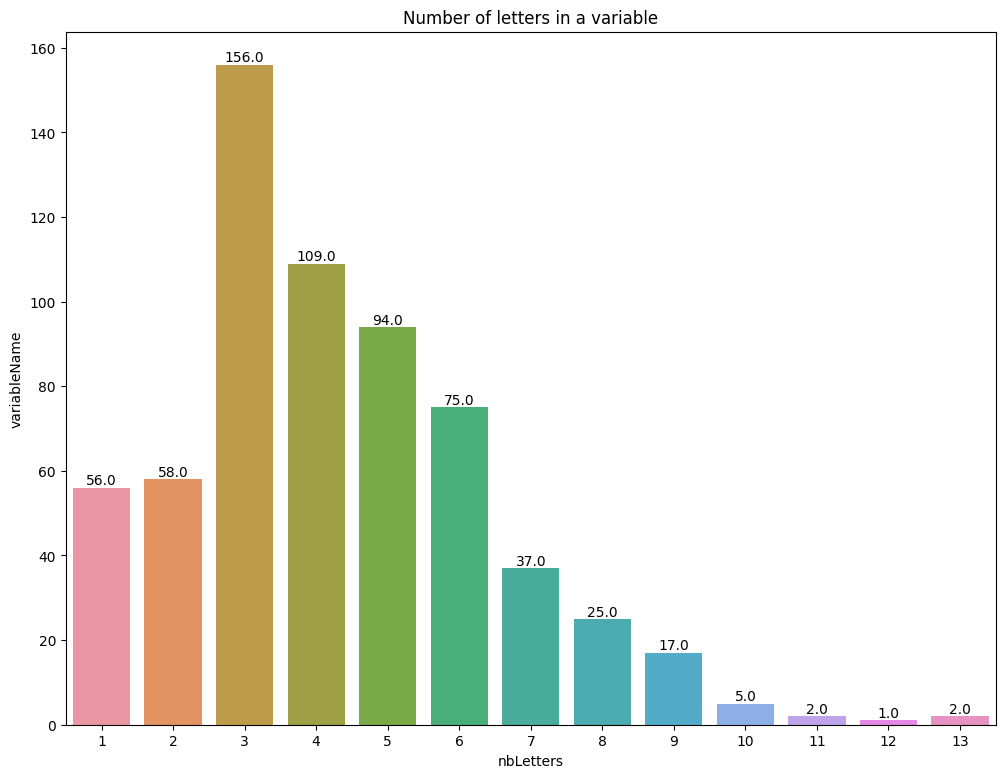

In [ ]:

d = varsStat.groupby(['nbLetters']).count()
plt.figure(figsize=(12,9))
plt.title("Number of letters in a variable")
# plt.ylabel("number of variables")
# plt.xlabel("length of the variable")
o = sn.barplot(data=d, x=d.index,y="variableName")
o.bar_label(o.containers[0], fmt='%.1f')

[Text(0, 0, '218.0'),
 Text(0, 0, '337.0'),
 Text(0, 0, '57.0'),
 Text(0, 0, '19.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '1.0')]

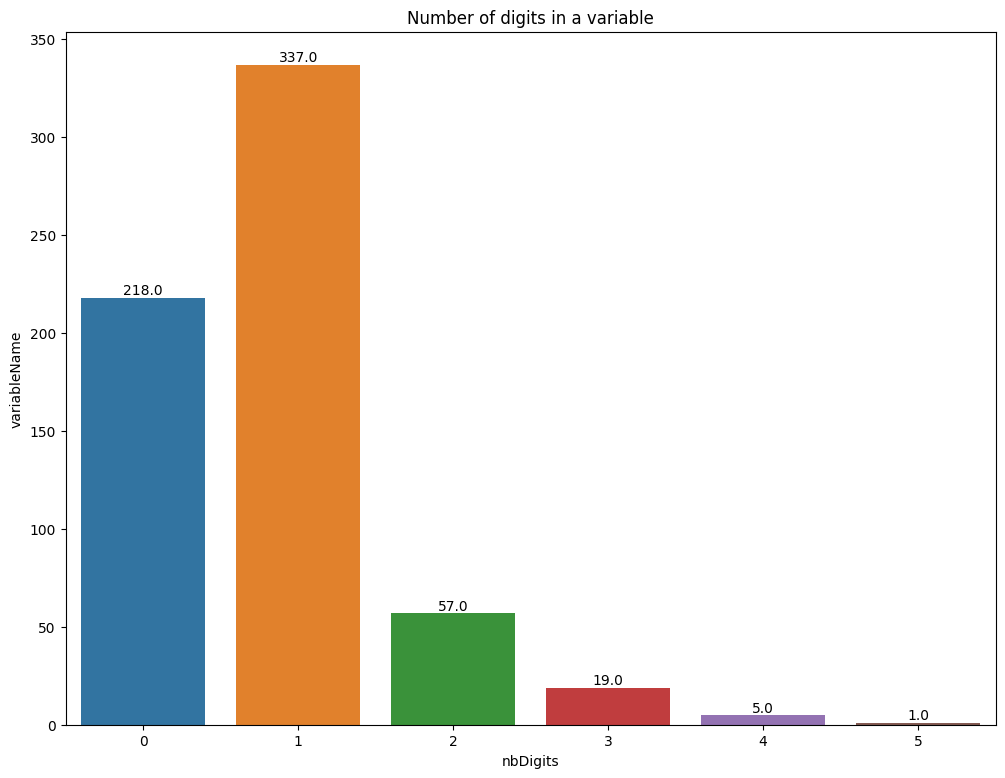

In [ ]:
d = varsStat.groupby(['nbDigits']).count()
plt.figure(figsize=(12,9))
plt.title("Number of digits in a variable")
# plt.ylabel("number of variables")
# plt.xlabel("length of the variable")
o = sn.barplot(data=d, x=d.index,y="variableName")
o.bar_label(o.containers[0], fmt='%.1f')

[Text(0, 0, '635.0'), Text(0, 0, '2.0')]

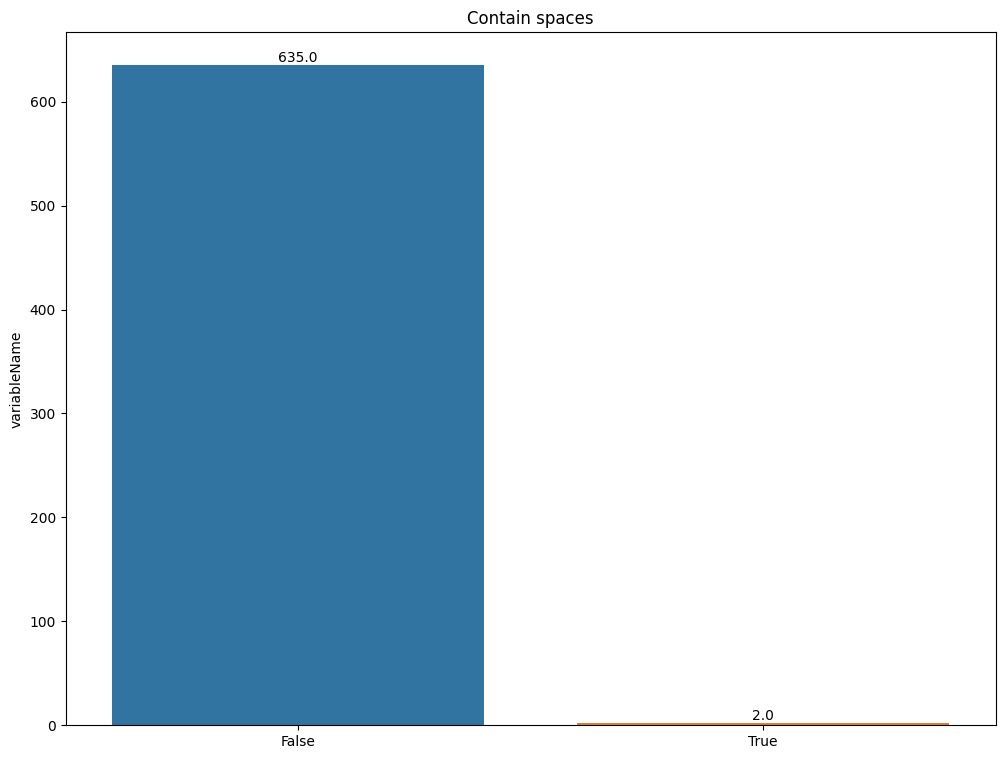

In [ ]:
d = varsStat.groupby(['space']).count()
plt.figure(figsize=(12,9))
plt.title("Contain spaces")
# plt.ylabel("number of variables")
# plt.xlabel("length of the variable")
o = sn.barplot(data=d, x=[str(v) for v in d.index.values],y="variableName")
o.bar_label(o.containers[0], fmt='%.1f')

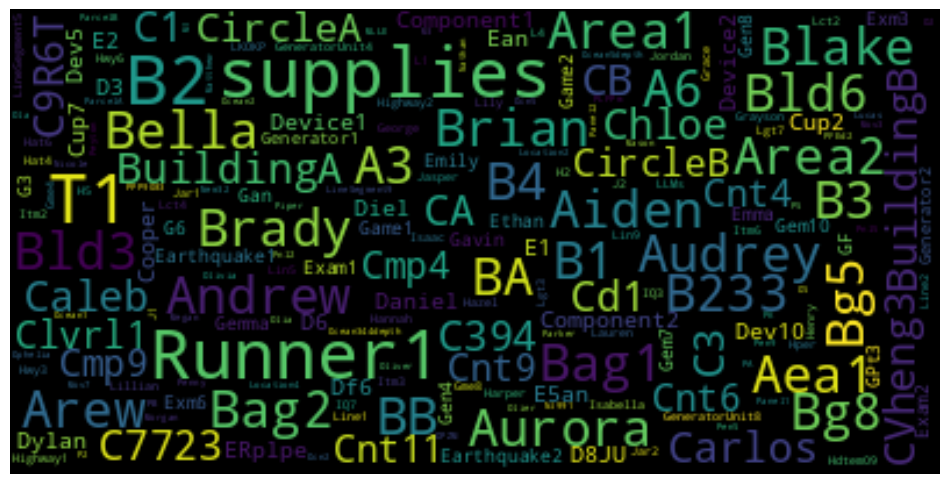

In [ ]:
vars = ""
for vv in np.unique(variables):
  vars += vv+" "



wordcloud = WordCloud(max_font_size=30).generate(vars)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Expressions

In [ ]:
dff = pd.DataFrame([
    {
    "Unique Expressions":list(np.unique(gtExpressions))
    },
    {
    "Unique Expressions":list(np.unique(geExpressions))
    },
    {
    "Unique Expressions":list(np.unique(ltExpressions))
    },
    {
    "Unique Expressions":list(np.unique(leExpressions))
    },
    {
    "Unique Expressions":list(np.unique(eqExpressions))
    },
    {
    "Unique Expressions":list(np.unique(neExpressions))
    }
    ]
    , index = ["gt","ge","lt","le","eq","ne"])

pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)


dff

,Unique Expressions
gt,"[exceed, faster than, greater than, heavier than, higher than, larger than, longer than, surpass, taller than, warmer than]"
ge,"[exceed or equal, faster than or equal to, greater or equal to, greater than or equal to, heavier than or equal to, higher than or equal to, larger than or equal to, longer than or equal to, longer than or equal to , surpass or equal, taller than or equal to, warmer than or equal to]"
lt,"[cheaper than, cooler than, fewer than, less than, lighter than, lower than, shorter than, slower than, smaller than, younger than]"
le,"[cooler than or equal to, less or equal to, less than or equal to, lighter than or equal to, lower than or equal to, lower than or equal to , shorter than or equal to, slower than or equal to, smaller than or equal to]"
eq,"[be the same as, equal to]"
ne,"[different than, not be equal to, not be the same as]"


[Text(0, 0, '10.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '12.0'),
 Text(0, 0, '9.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0')]

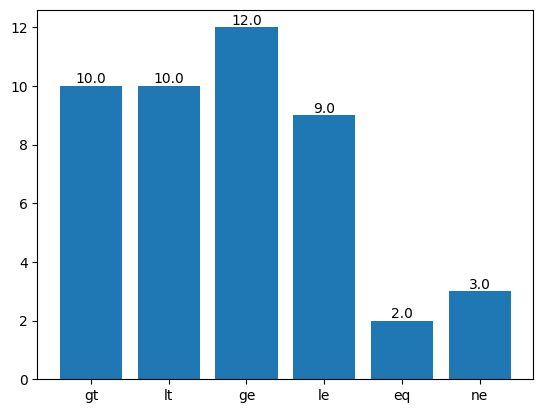

In [ ]:
labels = ["gt","lt","ge","le","eq","ne"]
lens = [len(list(np.unique(gtExpressions))),len(list(np.unique(ltExpressions))),len(list(np.unique(geExpressions))),len(list(np.unique(leExpressions))),len(list(np.unique(eqExpressions))),len(list(np.unique(neExpressions)))]

# number of unique expressions to describe each operator
plt.figure()
o = plt.bar(x=labels, height=lens)
plt.bar_label(o,fmt='%.1f')

# UnaryDistance

In [ ]:
df = pd.read_csv("/content/distancesUnary.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,problem,problem_entities
0,The separation between rxs5 and point 3 should not equal 7,"[{""start"": 0, ""end"": 22, ""type"": ""DESC"", ""entity"": ""The separation between""}, {""start"": 23, ""end"": 27, ""type"": ""Dist_Left_Elm_1"", ""entity"": ""rxs5""}, {""start"": 27, ""end"": 31, ""type"": ""DESC"", ""entity"": "" and""}, {""start"": 32, ""end"": 39, ""type"": ""Dist_Left_Elm_2"", ""entity"": ""point 3""}, {""start"": 39, ""end"": 46, ""type"": ""DESC"", ""entity"": "" should""}, {""start"": 47, ""end"": 56, ""type"": ""DistneValue"", ""entity"": ""not equal""}, {""start"": 57, ""end"": 58, ""type"": ""Parameter"", ""entity"": ""7""}, {""start"": 58, ""end"": 57, ""type"": ""DESC"", ""entity"": """"}]"
1,The gap from location1 to location2 must not match 9,"[{""start"": 0, ""end"": 12, ""type"": ""DESC"", ""entity"": ""The gap from""}, {""start"": 13, ""end"": 22, ""type"": ""Dist_Left_Elm_1"", ""entity"": ""location1""}, {""start"": 22, ""end"": 25, ""type"": ""DESC"", ""entity"": "" to""}, {""start"": 26, ""end"": 35, ""type"": ""Dist_Left_Elm_2"", ""entity"": ""location2""}, {""start"": 35, ""end"": 40, ""type"": ""DESC"", ""entity"": "" must""}, {""start"": 41, ""end"": 50, ""type"": ""DistneValue"", ""entity"": ""not match""}, {""start"": 51, ""end"": 52, ""type"": ""Parameter"", ""entity"": ""9""}, {""start"": 52, ""end"": 51, ""type"": ""DESC"", ""entity"": """"}]"
2,The measure of separation between g5 and reg should not equal 8,"[{""start"": 0, ""end"": 33, ""type"": ""DESC"", ""entity"": ""The measure of separation between""}, {""start"": 34, ""end"": 36, ""type"": ""Dist_Left_Elm_1"", ""entity"": ""g5""}, {""start"": 36, ""end"": 40, ""type"": ""DESC"", ""entity"": "" and""}, {""start"": 41, ""end"": 44, ""type"": ""Dist_Left_Elm_2"", ""entity"": ""reg""}, {""start"": 44, ""end"": 51, ""type"": ""DESC"", ""entity"": "" should""}, {""start"": 52, ""end"": 61, ""type"": ""DistneValue"", ""entity"": ""not equal""}, {""start"": 62, ""end"": 63, ""type"": ""Parameter"", ""entity"": ""8""}, {""start"": 63, ""end"": 62, ""type"": ""DESC"", ""entity"": """"}]"
3,The gap between position 3 and position 8 should not equal 20,"[{""start"": 0, ""end"": 15, ""type"": ""DESC"", ""entity"": ""The gap between""}, {""start"": 16, ""end"": 26, ""type"": ""Dist_Left_Elm_1"", ""entity"": ""position 3""}, {""start"": 26, ""end"": 30, ""type"": ""DESC"", ""entity"": "" and""}, {""start"": 31, ""end"": 41, ""type"": ""Dist_Left_Elm_2"", ""entity"": ""position 8""}, {""start"": 41, ""end"": 48, ""type"": ""DESC"", ""entity"": "" should""}, {""start"": 49, ""end"": 58, ""type"": ""DistneValue"", ""entity"": ""not equal""}, {""start"": 59, ""end"": 61, ""type"": ""Parameter"", ""entity"": ""20""}, {""start"": 61, ""end"": 60, ""type"": ""DESC"", ""entity"": """"}]"
4,The length between QwEr and dTyHj should be different than 8.,"[{""start"": 0, ""end"": 18, ""type"": ""DESC"", ""entity"": ""The length between""}, {""start"": 19, ""end"": 23, ""type"": ""Dist_Left_Elm_1"", ""entity"": ""QwEr""}, {""start"": 23, ""end"": 27, ""type"": ""DESC"", ""entity"": "" and""}, {""start"": 28, ""end"": 33, ""type"": ""Dist_Left_Elm_2"", ""entity"": ""dTyHj""}, {""start"": 33, ""end"": 43, ""type"": ""DESC"", ""entity"": "" should be""}, {""start"": 44, ""end"": 58, ""type"": ""DistneValue"", ""entity"": ""different than""}, {""start"": 59, ""end"": 60, ""type"": ""Parameter"", ""entity"": ""8""}, {""start"": 60, ""end"": 60, ""type"": ""DESC"", ""entity"": "".""}]"
...,...,...
279,Ensure a distance less than or equal to 6 is maintained between V9kb and jC2N.,"[{""start"": 0, ""end"": 17, ""type"": ""DESC"", ""entity"": ""Ensure a distance""}, {""start"": 18, ""end"": 39, ""type"": ""DistleValue"", ""entity"": ""less than or equal to""}, {""start"": 40, ""end"": 41, ""type"": ""Parameter"", ""entity"": ""6""}, {""start"": 41, ""end"": 63, ""type"": ""DESC"", ""entity"": "" is maintained between""}, {""start"": 64, ""end"": 68, ""type"": ""Dist_Le

In [ ]:
variables = []
gtExpressions = []
geExpressions = []
ltExpressions = []
leExpressions = []
eqExpressions = []
neExpressions = []

In [ ]:
import json
import re


for i in range(len(df)):
  txt = df.iloc[i]["problem"]
  labels = json.loads(re.sub(r"'(?=\})",'"',re.sub(r"'(?=,)",'"',re.sub(r"(?<=: )'",'"',re.sub(r"(?<=, )'",'"',re.sub(r"'(?=:)",'"',re.sub(r"(?<={)'",'"',str(df.iloc[i]["problem_entities"]))))))))
  for l in labels:
    if l["type"] == "Dist_Left_Elm_1" or l["type"] == "Dist_Left_Elm_2":
      variables.append(txt[l["start"]:l["end"]])
    elif l["type"] == "DistgtValue":
      gtExpressions.append(txt[l["start"]:l["end"]])
    elif l["type"] == "DistgeValue":
      geExpressions.append(txt[l["start"]:l["end"]])
    elif l["type"] == "DistltValue":
      ltExpressions.append(txt[l["start"]:l["end"]])
    elif l["type"] == "DistleValue":
      leExpressions.append(txt[l["start"]:l["end"]])
    elif l["type"] == "DisteqValue":
      eqExpressions.append(txt[l["start"]:l["end"]])
    elif l["type"] == "DistneValue":
      neExpressions.append(txt[l["start"]:l["end"]])


## Variables

In [ ]:
# length of a varialbe
# number of letters/digits
# spaces
# nb unique

uniqueVars = np.unique(variables)
lenunique = len(uniqueVars)

varsStat = pd.DataFrame(columns= ["variableName", "length","nbLetters","nbDigits","space"])

for v in uniqueVars:
  varsStat = pd.concat(
        [
            varsStat, pd.DataFrame(
                {
      "variableName":v,
      "length":len(v),
      "nbLetters":len([vv for vv in v if not vv.isnumeric()]),
      "nbDigits":len([vv for vv in v if vv.isnumeric()]),
      "space":" " in v
  }
                ,
                index=[len(varsStat)])
        ]
    )


<ipython-input-50-fcd2686e4318>:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  varsStat = pd.concat(
<ipython-input-50-fcd2686e4318>:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  varsStat = pd.concat(
<ipython-input-50-fcd2686e4318>:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  varsStat = pd.concat(
<ipython-input-50-fcd2686e4318>:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  varsStat = pd.concat(
<ipython-input-50-fcd2686e4318>:12: FutureWarning: In a future versi

In [ ]:
varsStat

,variableName,length,nbLetters,nbDigits,space
0,24Ds,4,2,2,False
1,2EF11,5,2,3,False
2,2Z5,3,1,2,False
3,3D12,4,1,3,False
4,3JKC,4,3,1,False
...,...,...,...,...,...
547,zP4Vq,5,4,1,False
548,zP8rHj,6,5,1,False
549,zR8q,4,3,1,False
550,zW7H,4,3,1,False


In [ ]:
lens = 0

for i in range(len(varsStat)):
  lens+=varsStat.iloc[i]["length"]
lens/len(varsStat)

4.833333333333333

[Text(0, 0, '5.0'),
 Text(0, 0, '17.0'),
 Text(0, 0, '64.0'),
 Text(0, 0, '128.0'),
 Text(0, 0, '229.0'),
 Text(0, 0, '58.0'),
 Text(0, 0, '19.0'),
 Text(0, 0, '15.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '1.0'),
 Text(0, 0, '7.0')]

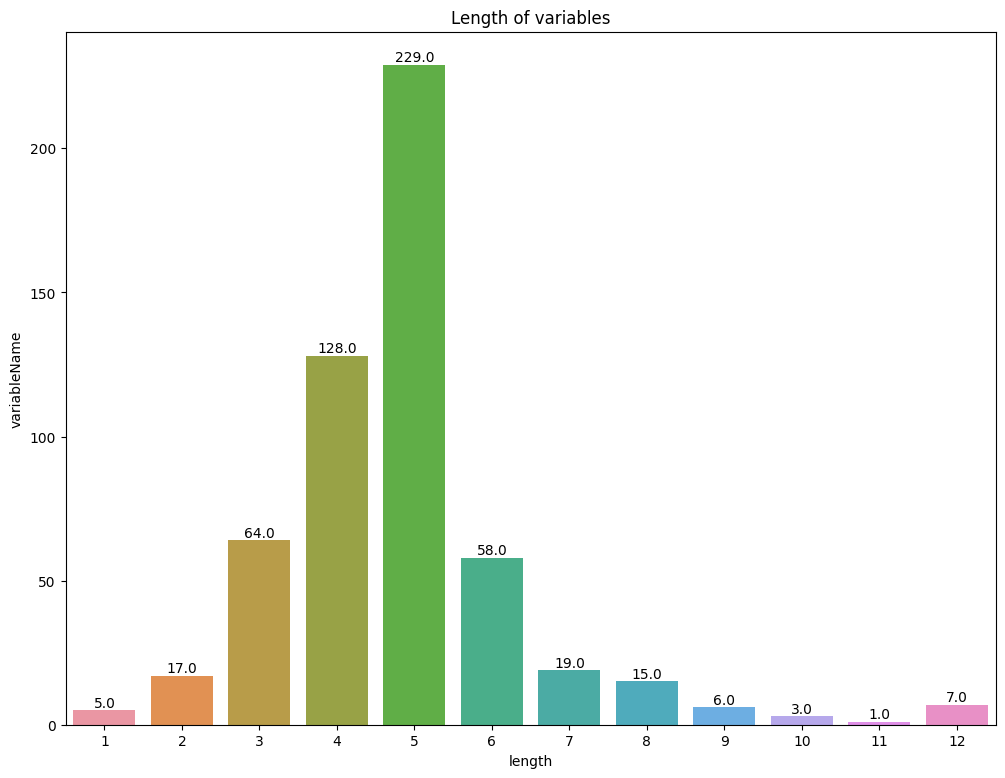

In [ ]:
# number of variables by length

d = varsStat.groupby(['length']).count()
plt.figure(figsize=(12,9))
plt.title("Length of variables")
# plt.ylabel("number of variables")
# plt.xlabel("length of the variable")
o = sn.barplot(data=d, x=d.index,y="variableName")
o.bar_label(o.containers[0], fmt='%.1f')

[Text(0, 0, '19.0'),
 Text(0, 0, '73.0'),
 Text(0, 0, '125.0'),
 Text(0, 0, '217.0'),
 Text(0, 0, '74.0'),
 Text(0, 0, '14.0'),
 Text(0, 0, '14.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '4.0')]

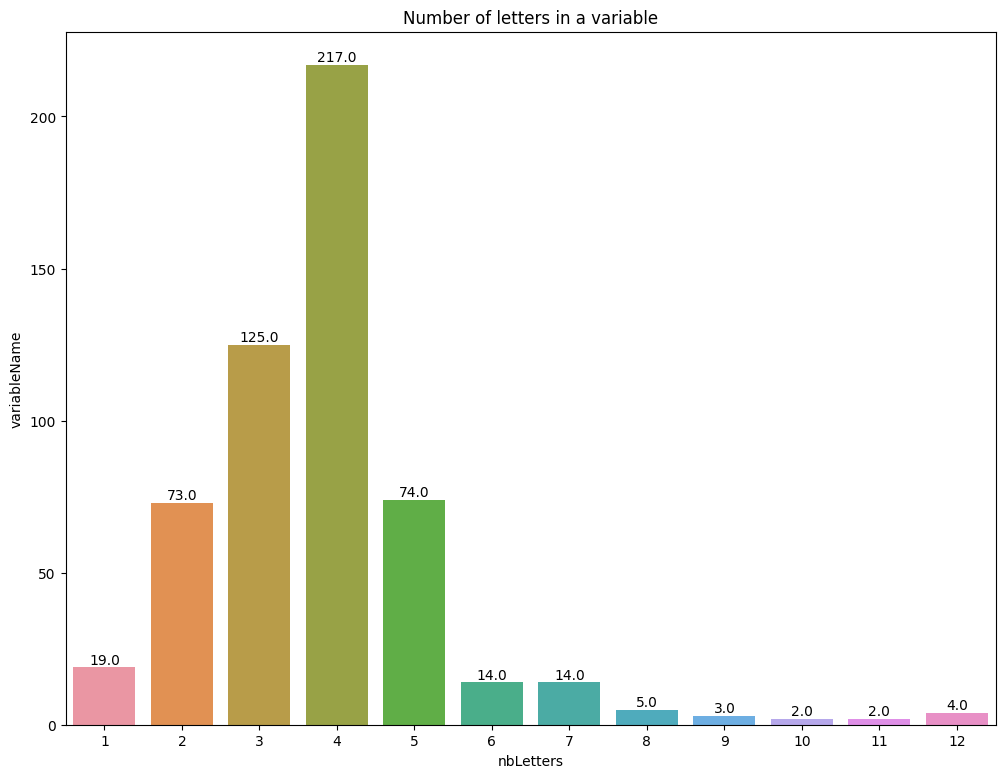

In [ ]:

d = varsStat.groupby(['nbLetters']).count()
plt.figure(figsize=(12,9))
plt.title("Number of letters in a variable")
# plt.ylabel("number of variables")
# plt.xlabel("length of the variable")
o = sn.barplot(data=d, x=d.index,y="variableName")
o.bar_label(o.containers[0], fmt='%.1f')

[Text(0, 0, '77.0'),
 Text(0, 0, '416.0'),
 Text(0, 0, '46.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '1.0')]

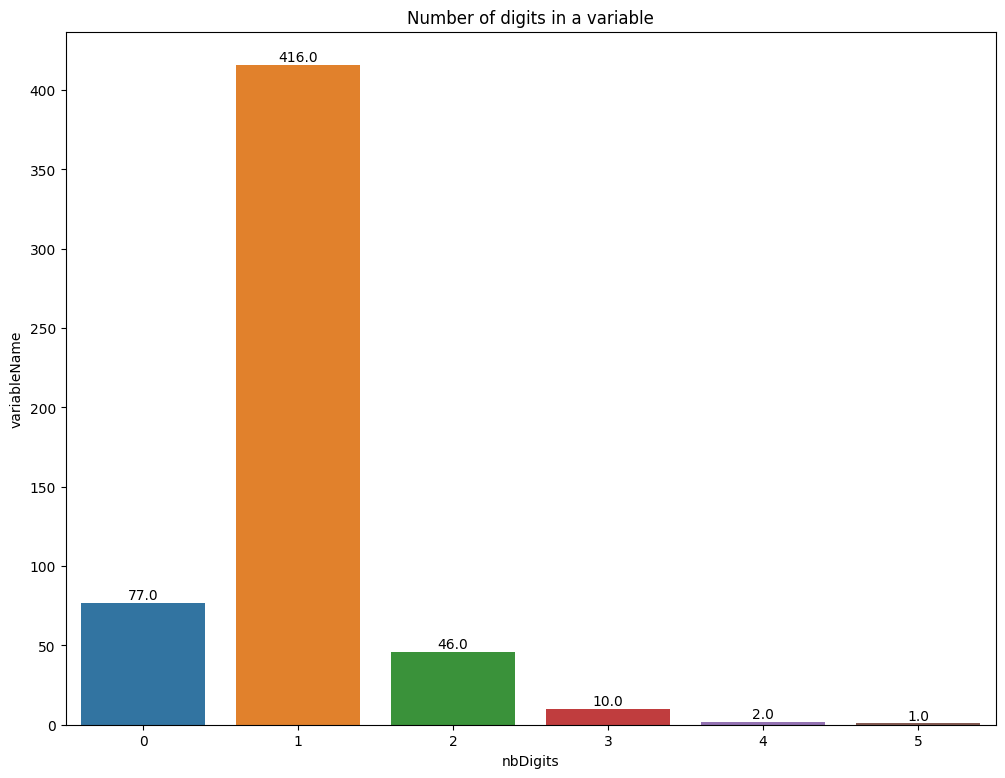

In [ ]:
d = varsStat.groupby(['nbDigits']).count()
plt.figure(figsize=(12,9))
plt.title("Number of digits in a variable")
# plt.ylabel("number of variables")
# plt.xlabel("length of the variable")
o = sn.barplot(data=d, x=d.index,y="variableName")
o.bar_label(o.containers[0], fmt='%.1f')

[Text(0, 0, '525.0'), Text(0, 0, '27.0')]

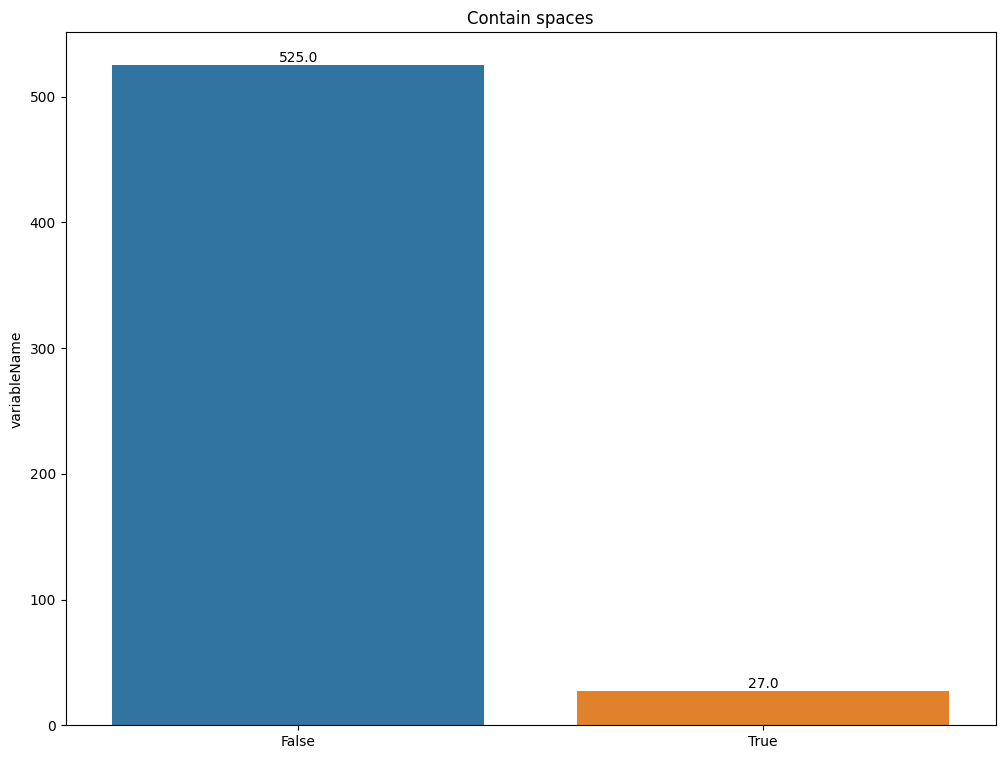

In [ ]:
d = varsStat.groupby(['space']).count()
plt.figure(figsize=(12,9))
plt.title("Contain spaces")
# plt.ylabel("number of variables")
# plt.xlabel("length of the variable")
o = sn.barplot(data=d, x=[str(v) for v in d.index.values],y="variableName")
o.bar_label(o.containers[0], fmt='%.1f')

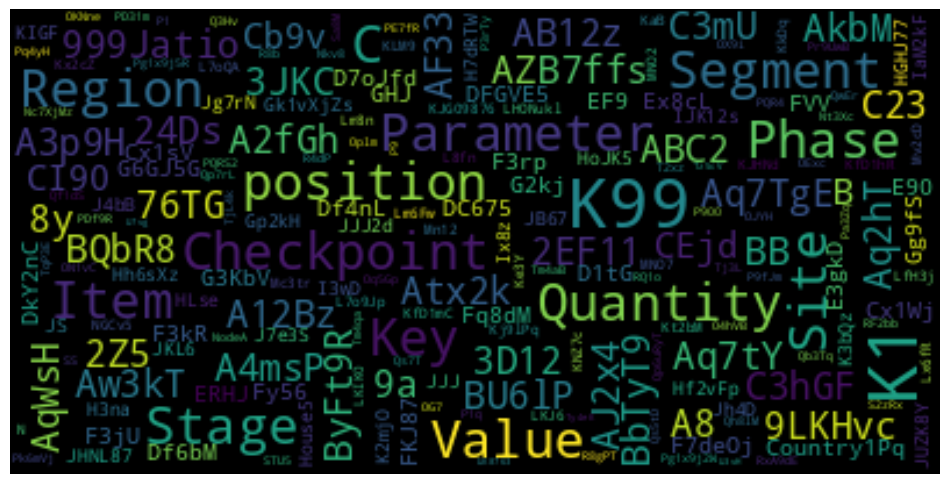

In [ ]:

vars = ""
for vv in np.unique(variables):
  vars += vv+" "



wordcloud = WordCloud(max_font_size=30).generate(vars)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Expressions

In [ ]:
dff = pd.DataFrame([
    {
    "Unique Expressions":list(np.unique(gtExpressions))
    },
    {
    "Unique Expressions":list(np.unique(geExpressions))
    },
    {
    "Unique Expressions":list(np.unique(ltExpressions))
    },
    {
    "Unique Expressions":list(np.unique(leExpressions))
    },
    {
    "Unique Expressions":list(np.unique(eqExpressions))
    },
    {
    "Unique Expressions":list(np.unique(neExpressions))
    }
    ]
    , index = ["DistgtValue","DistgeValue","DistltValue","DistleValue","DisteqValue","DistneValue"])

pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)


dff

,Unique Expressions
DistgtValue,"[exceed, greater than, more than]"
DistgeValue,"[at least, exceed or equal, greater than or equal to]"
DistltValue,[less than]
DistleValue,[less than or equal to]
DisteqValue,"[amount to, be, be equal to, be exactly, be identical to, be precisely, equal, equal to, equals, identical to, match, measure exactly, measure precisely, must be]"
DistneValue,"[contrast, contrast with, different than, dissimilar to, distinct from, is not maintained, not amount to, not be, not be equal to, not be exactly, not equal, not exceed, not maintained, not match, not measure, not measure exactly, not measure precisely]"


[Text(0, 0, '3.0'),
 Text(0, 0, '1.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '1.0'),
 Text(0, 0, '14.0'),
 Text(0, 0, '17.0')]

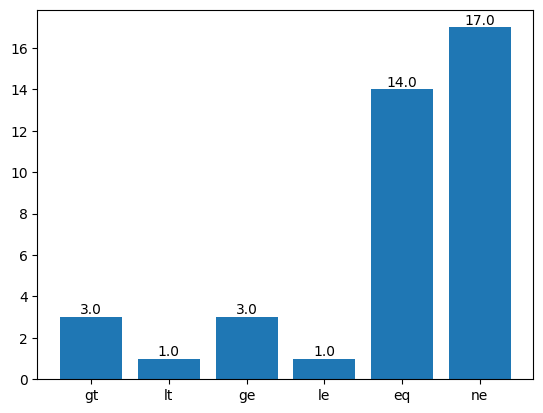

In [ ]:
labels = ["gt","lt","ge","le","eq","ne"]
lens = [len(list(np.unique(gtExpressions))),len(list(np.unique(ltExpressions))),len(list(np.unique(geExpressions))),len(list(np.unique(leExpressions))),len(list(np.unique(eqExpressions))),len(list(np.unique(neExpressions)))]

# number of unique expressions to describe each operator
plt.figure()
o = plt.bar(x=labels, height=lens)
plt.bar_label(o,fmt='%.1f')

# BinaryDistance

In [ ]:
df = pd.read_csv("/content/distancesBinary.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,problem,problem_entities
0,The separation between point1 and point 3 should not equal the separation between point8 and point9.,"[{""start"": 0, ""end"": 22, ""type"": ""DESC"", ""entity"": ""The separation between""}, {""start"": 23, ""end"": 29, ""type"": ""Dist_Left_Elm_1"", ""entity"": ""point1""}, {""start"": 29, ""end"": 33, ""type"": ""DESC"", ""entity"": "" and""}, {""start"": 34, ""end"": 41, ""type"": ""Dist_Left_Elm_2"", ""entity"": ""point 3""}, {""start"": 41, ""end"": 48, ""type"": ""DESC"", ""entity"": "" should""}, {""start"": 49, ""end"": 58, ""type"": ""DistneDist"", ""entity"": ""not equal""}, {""start"": 58, ""end"": 81, ""type"": ""DESC"", ""entity"": "" the separation between""}, {""start"": 82, ""end"": 88, ""type"": ""Dist_Right_Elm_1"", ""entity"": ""point8""}, {""start"": 88, ""end"": 92, ""type"": ""DESC"", ""entity"": "" and""}, {""start"": 93, ""end"": 99, ""type"": ""Dist_Right_Elm_2"", ""entity"": ""point9""}, {""start"": 99, ""end"": 99, ""type"": ""DESC"", ""entity"": "".""}]"
1,The gap from location1 to location2 must not match the gap from location4 to location8.,"[{""start"": 0, ""end"": 12, ""type"": ""DESC"", ""entity"": ""The gap from""}, {""start"": 13, ""end"": 22, ""type"": ""Dist_Left_Elm_1"", ""entity"": ""location1""}, {""start"": 22, ""end"": 25, ""type"": ""DESC"", ""entity"": "" to""}, {""start"": 26, ""end"": 35, ""type"": ""Dist_Left_Elm_2"", ""entity"": ""location2""}, {""start"": 35, ""end"": 40, ""type"": ""DESC"", ""entity"": "" must""}, {""start"": 41, ""end"": 50, ""type"": ""DistneDist"", ""entity"": ""not match""}, {""start"": 50, ""end"": 63, ""type"": ""DESC"", ""entity"": "" the gap from""}, {""start"": 64, ""end"": 73, ""type"": ""Dist_Right_Elm_1"", ""entity"": ""location4""}, {""start"": 73, ""end"": 76, ""type"": ""DESC"", ""entity"": "" to""}, {""start"": 77, ""end"": 86, ""type"": ""Dist_Right_Elm_2"", ""entity"": ""location8""}, {""start"": 86, ""end"": 86, ""type"": ""DESC"", ""entity"": "".""}]"
2,The interval between checkpoint2 and checkpoint1 ought to differ from the interval between checkpoint9 and checkpoint19.,"[{""start"": 0, ""end"": 20, ""type"": ""DESC"", ""entity"": ""The interval between""}, {""start"": 21, ""end"": 32, ""type"": ""Dist_Left_Elm_1"", ""entity"": ""checkpoint2""}, {""start"": 32, ""end"": 36, ""type"": ""DESC"", ""entity"": "" and""}, {""start"": 37, ""end"": 48, ""type"": ""Dist_Left_Elm_2"", ""entity"": ""checkpoint1""}, {""start"": 48, ""end"": 57, ""type"": ""DESC"", ""entity"": "" ought to""}, {""start"": 58, ""end"": 64, ""type"": ""DistneDist"", ""entity"": ""differ""}, {""start"": 64, ""end"": 90, ""type"": ""DESC"", ""entity"": "" from the interval between""}, {""start"": 91, ""end"": 102, ""type"": ""Dist_Right_Elm_1"", ""entity"": ""checkpoint9""}, {""start"": 102, ""end"": 106, ""type"": ""DESC"", ""entity"": "" and""}, {""start"": 107, ""end"": 119, ""type"": ""Dist_Right_Elm_2"", ""entity"": ""checkpoint19""}, {""start"": 119, ""end"": 119, ""type"": ""DESC"", ""entity"": "".""}]"
3,The space separating spot1 and spot2 should not mirror the space separating spot3 and spot2.,"[{""start"": 0, ""end"": 20, ""type"": ""DESC"", ""entity"": ""The space separating""}, {""start"": 21, ""end"": 26, ""type"": ""Dist_Left_Elm_1"", ""entity"": ""spot1""}, {""start"": 26, ""end"": 30, ""type"": ""DESC"", ""entity"": "" and""}, {""start"": 31, ""end"": 36, ""type"": ""Dist_Left_Elm_2"", ""entity"": ""spot2""}, {""start"": 36, ""end"": 43, ""type"": ""DESC"", ""entity"": "" should""}, {""start"": 44, ""end"": 54, ""type"": ""DistneDist"", ""entity"": ""not mirror""}, {""start"": 54, ""end"": 75, ""type"": ""DESC"", ""entity"": "" the space separating""}, {""start"": 76, ""end"": 81, ""type"": ""Dist_Right_Elm_1"", ""entity"": ""spot3""}, {""start"": 81, ""end"": 85, ""type"": ""DESC"", ""entity"": "" and""}, {""start"": 86, ""end"": 91, ""type"": ""Dist_Right_Elm_2"", ""entity"": ""spot2""}, {""start"": 91, ""end"": 91, ""type"": 

In [ ]:
variables = []
gtExpressions = []
geExpressions = []
ltExpressions = []
leExpressions = []
eqExpressions = []
neExpressions = []

In [ ]:
import json
import re


for i in range(len(df)):
  txt = df.iloc[i]["problem"]
  labels = json.loads(re.sub(r"'(?=\})",'"',re.sub(r"'(?=,)",'"',re.sub(r"(?<=: )'",'"',re.sub(r"(?<=, )'",'"',re.sub(r"'(?=:)",'"',re.sub(r"(?<={)'",'"',str(df.iloc[i]["problem_entities"]))))))))
  for l in labels:
    if l["type"] == "Dist_Right_Elm_1" or l["type"] == "Dist_Right_Elm_2" or l["type"] == "Dist_Left_Elm_1" or l["type"] == "Dist_Left_Elm_2":
      variables.append(txt[l["start"]:l["end"]])
    elif l["type"] == "DistgtDist":
      gtExpressions.append(txt[l["start"]:l["end"]])
    elif l["type"] == "DistgeDist":
      geExpressions.append(txt[l["start"]:l["end"]])
    elif l["type"] == "DistltDist":
      ltExpressions.append(txt[l["start"]:l["end"]])
    elif l["type"] == "DistleDist":
      leExpressions.append(txt[l["start"]:l["end"]])
    elif l["type"] == "DisteqDist":
      eqExpressions.append(txt[l["start"]:l["end"]])
    elif l["type"] == "DistneDist":
      neExpressions.append(txt[l["start"]:l["end"]])


In [ ]:
len(np.unique(variables))

1040

In [ ]:
len(variables)

1104

## Variables

In [ ]:
# length of a varialbe
# number of letters/digits
# spaces
# nb unique

uniqueVars = np.unique(variables)
lenunique = len(uniqueVars)

varsStat = pd.DataFrame(columns= ["variableName", "length","nbLetters","nbDigits","space"])

for v in uniqueVars:
  varsStat = pd.concat(
        [
            varsStat, pd.DataFrame(
                {
      "variableName":v,
      "length":len(v),
      "nbLetters":len([vv for vv in v if not vv.isnumeric()]),
      "nbDigits":len([vv for vv in v if vv.isnumeric()]),
      "space":" " in v
  }
                ,
                index=[len(varsStat)])
        ]
    )


<ipython-input-66-fcd2686e4318>:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  varsStat = pd.concat(
<ipython-input-66-fcd2686e4318>:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  varsStat = pd.concat(
<ipython-input-66-fcd2686e4318>:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  varsStat = pd.concat(
<ipython-input-66-fcd2686e4318>:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  varsStat = pd.concat(
<ipython-input-66-fcd2686e4318>:12: FutureWarning: In a future versi

In [ ]:
varsStat

,variableName,length,nbLetters,nbDigits,space
0,0LKUPM,6,5,1,False
1,1234lmn15,9,3,6,False
2,22ddG,5,3,2,False
3,456xy6,6,2,4,False
4,7890efg8,8,3,5,False
...,...,...,...,...,...
1035,zL1f,4,3,1,False
1036,zX2rG,5,4,1,False
1037,ziolmp56,8,6,2,False
1038,zkd5,4,3,1,False


In [ ]:
lens = 0

for i in range(len(varsStat)):
  lens+=varsStat.iloc[i]["length"]
lens/len(varsStat)

4.752884615384615

[Text(0, 0, '18.0'),
 Text(0, 0, '129.0'),
 Text(0, 0, '165.0'),
 Text(0, 0, '303.0'),
 Text(0, 0, '142.0'),
 Text(0, 0, '91.0'),
 Text(0, 0, '62.0'),
 Text(0, 0, '33.0'),
 Text(0, 0, '34.0'),
 Text(0, 0, '21.0'),
 Text(0, 0, '28.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '1.0'),
 Text(0, 0, '1.0')]

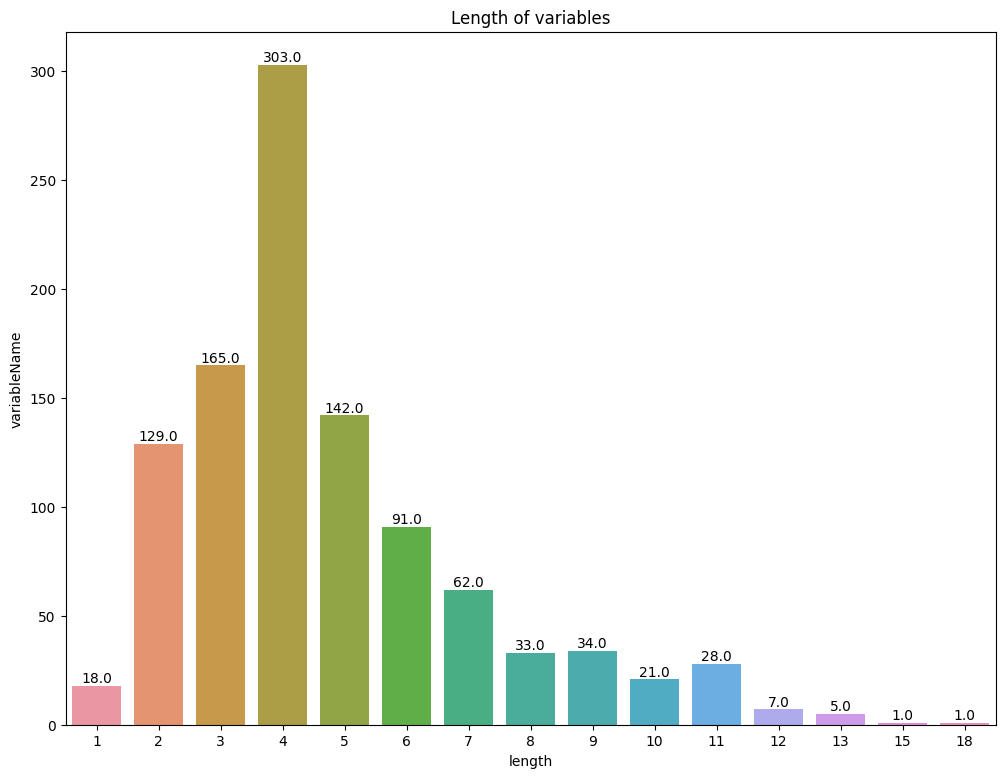

In [ ]:
# number of variables by length

d = varsStat.groupby(['length']).count()
plt.figure(figsize=(12,9))
plt.title("Length of variables")
# plt.ylabel("number of variables")
# plt.xlabel("length of the variable")
o = sn.barplot(data=d, x=d.index,y="variableName")
o.bar_label(o.containers[0], fmt='%.1f')

[Text(0, 0, '152.0'),
 Text(0, 0, '110.0'),
 Text(0, 0, '330.0'),
 Text(0, 0, '149.0'),
 Text(0, 0, '107.0'),
 Text(0, 0, '61.0'),
 Text(0, 0, '38.0'),
 Text(0, 0, '27.0'),
 Text(0, 0, '23.0'),
 Text(0, 0, '16.0'),
 Text(0, 0, '15.0'),
 Text(0, 0, '9.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '1.0')]

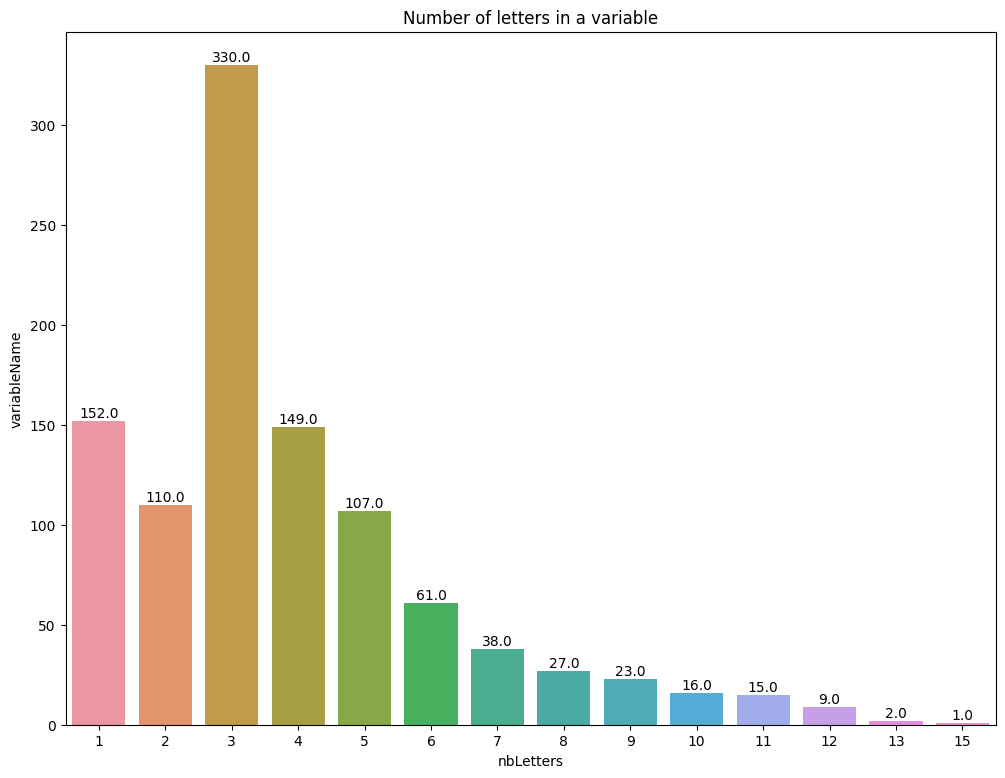

In [ ]:
d = varsStat.groupby(['nbLetters']).count()
plt.figure(figsize=(12,9))
plt.title("Number of letters in a variable")
# plt.ylabel("number of variables")
# plt.xlabel("length of the variable")
o = sn.barplot(data=d, x=d.index,y="variableName")
o.bar_label(o.containers[0], fmt='%.1f')

[Text(0, 0, '378.0'),
 Text(0, 0, '457.0'),
 Text(0, 0, '170.0'),
 Text(0, 0, '23.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '1.0')]

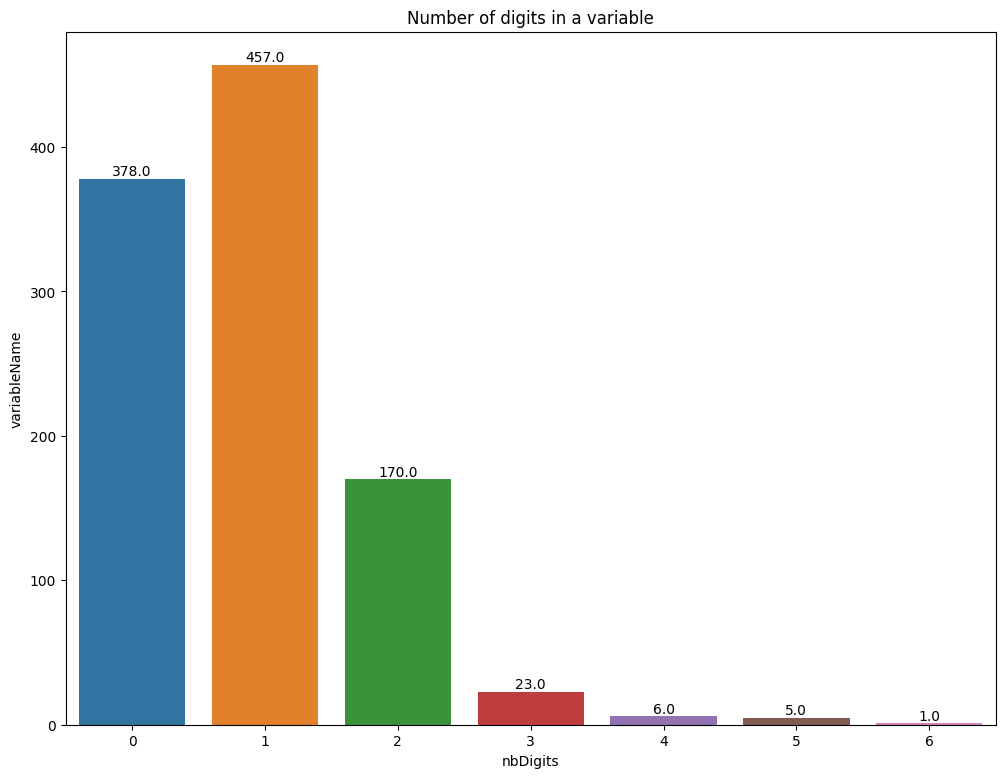

In [ ]:
d = varsStat.groupby(['nbDigits']).count()
plt.figure(figsize=(12,9))
plt.title("Number of digits in a variable")
# plt.ylabel("number of variables")
# plt.xlabel("length of the variable")
o = sn.barplot(data=d, x=d.index,y="variableName")
o.bar_label(o.containers[0], fmt='%.1f')

[Text(0, 0, '910.0'), Text(0, 0, '130.0')]

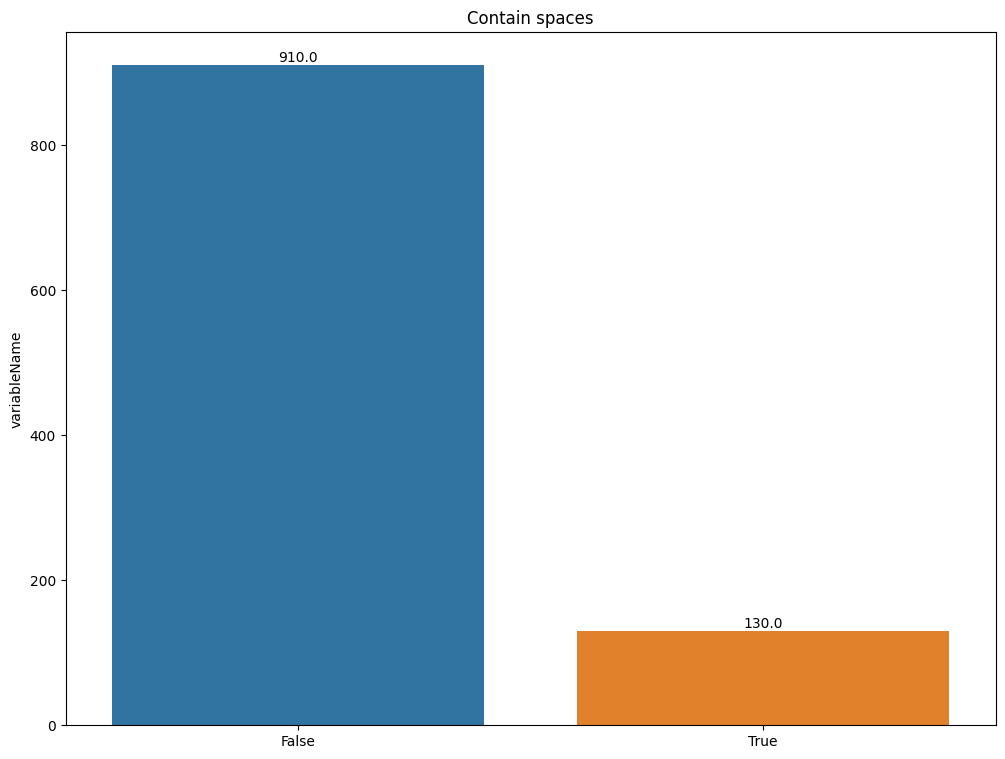

In [ ]:
d = varsStat.groupby(['space']).count()
plt.figure(figsize=(12,9))
plt.title("Contain spaces")
# plt.ylabel("number of variables")
# plt.xlabel("length of the variable")
o = sn.barplot(data=d, x=[str(v) for v in d.index.values],y="variableName")
o.bar_label(o.containers[0], fmt='%.1f')

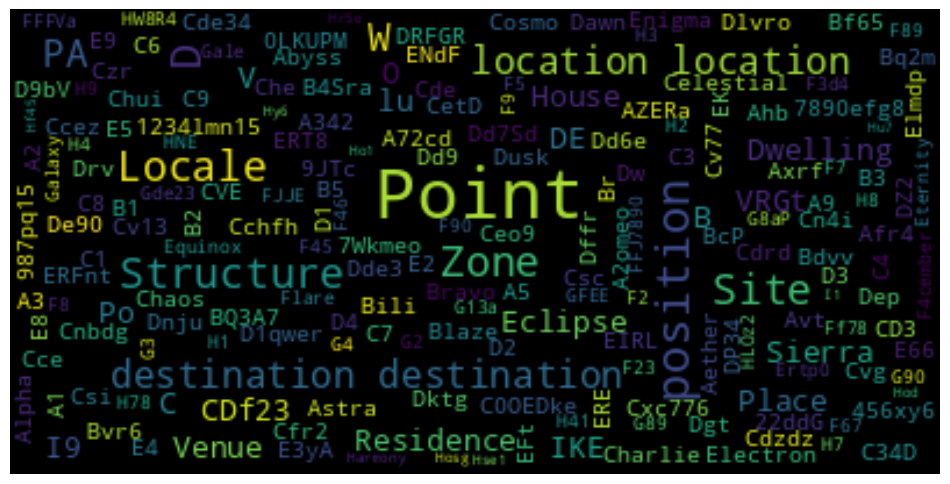

In [ ]:
vars = ""
for vv in np.unique(variables):
  vars += vv+" "



wordcloud = WordCloud(max_font_size=30).generate(vars)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Expressions

In [ ]:
dff = pd.DataFrame([
    {
    "Unique Expressions":list(np.unique(gtExpressions))
    },
    {
    "Unique Expressions":list(np.unique(geExpressions))
    },
    {
    "Unique Expressions":list(np.unique(ltExpressions))
    },
    {
    "Unique Expressions":list(np.unique(leExpressions))
    },
    {
    "Unique Expressions":list(np.unique(eqExpressions))
    },
    {
    "Unique Expressions":list(np.unique(neExpressions))
    }
    ]
    , index = ["DistgtDist","DistgeDist","DistltDist","DistleDist","DisteqDist","DistneDist"])

pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)


dff

,Unique Expressions
DistgtDist,"[exceed, greater than]"
DistgeDist,[greater than or equal to]
DistltDist,"[less than, not exceed, smaller than]"
DistleDist,"[less than or equal to, smaller than or equal to]"
DisteqDist,"[be the same as, coincide, equal, equal to, match, mirror, not deviate, resemble]"
DistneDist,"[ not exceed, apparent, be evident, be noticeable, contrast, deviate, differ, differ from, different, discernible, dissimilar, distinct, distinguishable, diverge, not be equal to, not coincide, not equal, not exceed, not match, not mirror, not replicate, not resemble, noticeable, observable, vary]"


[Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '25.0')]

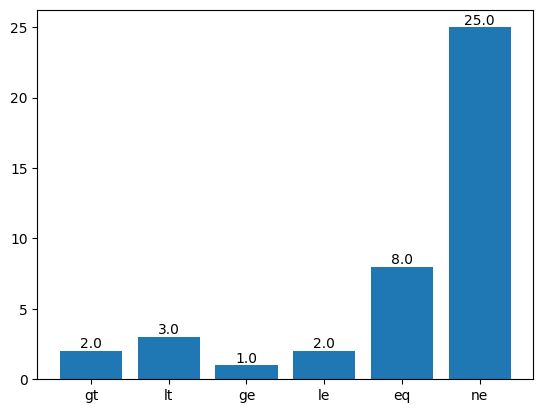

In [ ]:
labels = ["gt","lt","ge","le","eq","ne"]
lens = [len(list(np.unique(gtExpressions))),len(list(np.unique(ltExpressions))),len(list(np.unique(geExpressions))),len(list(np.unique(leExpressions))),len(list(np.unique(eqExpressions))),len(list(np.unique(neExpressions)))]

# number of unique expressions to describe each operator
plt.figure()
o = plt.bar(x=labels, height=lens)
plt.bar_label(o,fmt='%.1f')